In [3]:
plt.rcParams['font.size']=16

In [1]:
# import nltk
# import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download()

In [2]:
import pandas as pd
from pandas import DataFrame, Series
import PyPDF2
from PyPDF2 import PdfFileReader
import math
import requests
import regex as re
import datetime
import matplotlib 
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import numpy as np
from datetime import datetime

In [4]:
meeting = DataFrame(pd.read_csv("Board Committee Commission Meeting Data.csv"))
agendas = meeting['Agenda_Link']
notes = meeting['Minutes_Link']

In [5]:
for i in range(len(meeting)):
    new = re.sub(r"\s", "", meeting['Meeting_ID'][i])
    meeting['Meeting_ID'][i] = new

<ipython-input-5-77a6d85d7f34>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meeting['Meeting_ID'][i] = new


download **agenda** pdfs with the request module

In [6]:
# for i, url in enumerate(agendas):
#     try:
#         r = requests.get(url)
#         r.raise_for_status()
#     except Exception:
#         continue
#     text = "pdf_agendas/{}.pdf"
#     with open(text.format(meeting.iloc[i,0]),'wb') as f:
#         f.write(r.content)

download **notes** pdfs with the request module

In [7]:
# for i, url in enumerate(notes):
#     try:
#         r = requests.get(url)
#         r.raise_for_status()
#     except Exception:
#         continue
#     text = "pdf_notes/{}.pdf"
#     with open(text.format(meeting.iloc[i,0]),'wb') as f:
#         f.write(r.content)

In [8]:
meeting['Duration_minutes'] = meeting['Duration'] #copy a column so that I have one to replace with the cell below

In [9]:
for i in range(len(meeting['Duration'])):
    time = re.split(':',meeting['Duration'][i])
    time = [int(x) for x in time]
    seconds = time[0]*60 + time[1] + time[0]/60
    meeting.iloc[i,10] = seconds

In [10]:
meeting

,Meeting_ID,Topic,Scheduled_Start_Time,Zoom_Meeting_Start_Time,Zoom_Meeting_End_Time,Duration,Participants,Recording,Agenda_Link,Minutes_Link,Duration_minutes
0,954410442,CCEC,4:30:00 PM,3/31/2020 15:40,6:27 PM,2:47:55,52,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,167.033
1,531697510,Common Council,6:30:00 PM,3/31/2020 17:04,02:53 AM(Next day),9:48:36,337,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,588.15
2,411578576,"Finance Committee: Meeting of April 6, 2020",4:30:00 PM,4/6/2020 15:40,5:49 PM,2:09:00,31,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,129.033
3,563608269,"CCEC: Meeting of April 9, 2020",6:00:00 PM,4/9/2020 16:57,7:53 PM,2:56:08,36,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,176.033
4,468948855,"Plan Commission: Meeting of April 13, 2020",5:30:00 PM,4/13/2020 16:35,9:14 PM,4:38:54,80,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,278.067
...,...,...,...,...,...,...,...,...,...,...,...
150,93491014777,Public Safety Review Committee Budget Subcommi...,NaN,7/29/2020 17:46,8:17 PM,2:30:50,21,Yes,NaN,NaN,150.033
151,98563848547,"Plan Commission: Meeting of July 30, 2020",5:00:00 PM,7/30/2020 15:58,8:06 PM,4:08:29,54,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,248.067
152,99885787121,Body-Worn Camera Feasibility Review Committee:...,5:30:00 PM,7/30/2020 17:06,7:35 PM,2:28:11,23,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,148.033
153,94972195424,Task Force on Municipal Golf in Madison Parks:...,6:00:00 PM,7/30/2020 17:35,8:24 PM,2:49:27,81,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,169.033


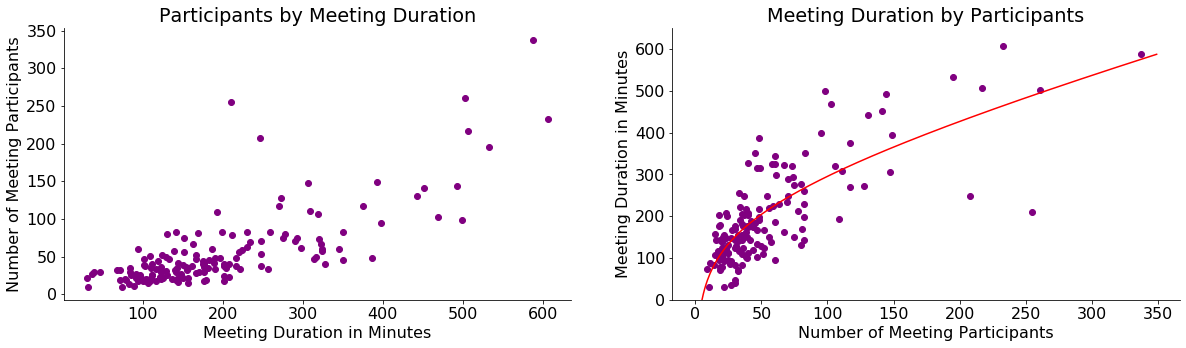

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2 ,figsize = (20,5))
ax[0].scatter(x='Duration_minutes', y = 'Participants', color='purple',data=meeting)
ax[1].scatter(x='Participants', y = 'Duration_minutes', color='purple',data=meeting)
ax[0].set_xlabel("Meeting Duration in Minutes")
ax[0].set_ylabel("Number of Meeting Participants")
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].set_title('Participants by Meeting Duration')

ax[1].set_ylabel("Meeting Duration in Minutes")
ax[1].set_xlabel("Number of Meeting Participants")
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].set_title('Meeting Duration by Participants')
ax[1].set_ylim(0,650)

lr = LinearRegression()
poly_df=get_xterms(meeting['Participants'])
lr.fit(poly_df, meeting[['Duration_minutes']])
x = np.arange(0.1,350,1)
ax[1].plot(x, lr.predict(get_xterms(x)),'r')

# meeting.plot.scatter(x='Duration_minutes', y = 'Participants', ax=ax, color='purple')

# X=meeting['Duration_minutes'].values.reshape(-1, 1)
# y=meeting['Participants'].values

# r = LinearRegression()
# r.fit(X, y)
# plt.plot(X, r.predict(X),color='r')

# print("Coef:", r.coef_)
# print("Intercept:", r.intercept_)

# def formula(reg, columns):
#     rv = ""
#     for i in range(len(columns)):
#         rv += "{}*{} + ".format(reg.coef_[0], columns[i])
#     rv += str(r.intercept_)
#     return rv

# print("Number of Participants ~= " + formula(r, ['Duration_minutes']))

# ax.set_xlabel("Meeting Duration in Minutes")
# ax.set_ylabel("Number of Meeting Participants")
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.set_title('Participants by Meeting Duration')
plt.savefig('Participants_vs_Duration.png',bbox='tight')

In [12]:
def get_xterms(x):
    t = pd.DataFrame({"x":x})
    t['logx'] = np.log(t['x'])
    t['log2x'] = np.log2(t['x'])
    return t

Meeting Duration ~= 0.8035186814214206*x + 23.79190995257445*logx + 34.32447050185595*log2x + -122.65340047792333


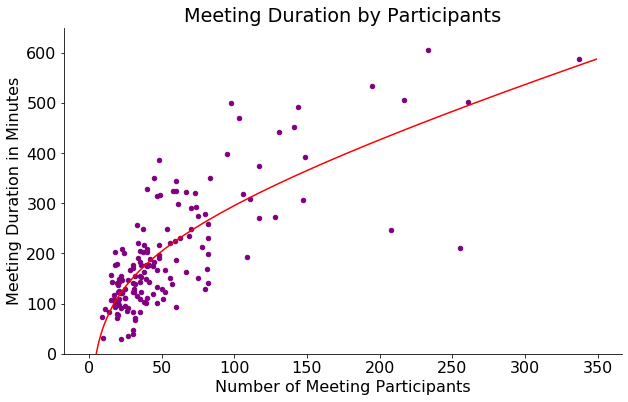

In [14]:
fig, ax = plt.subplots(figsize = (10,6))
meeting.plot.scatter(y='Duration_minutes', x = 'Participants', ax=ax, color='purple')
ax.set_ylabel("Meeting Duration in Minutes")
ax.set_xlabel("Number of Meeting Participants")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Meeting Duration by Participants')
ax.set_ylim(0,650)

lr = LinearRegression()
poly_df=get_xterms(meeting['Participants'])
lr.fit(poly_df, meeting[['Duration_minutes']])
x = np.arange(0.1,350,1)
ax.plot(x, lr.predict(get_xterms(x)),'r')

# print(lr.coef_,lr.intercept_)


# plt.savefig('meeting_participants.png')

def formula(reg, columns):
    rv = ""
    for i in range(len(columns)):
        rv += "{}*{} + ".format(reg.coef_[0,i], columns[i])
    rv += str(lr.intercept_[0])
    return rv

print("Meeting Duration ~= " + formula(lr, poly_df.columns))
plt.savefig('meeting_participants.EPS')

Next Steps: Can we predict Meeting Duration by estimating number of participants or vice versa? 

**Extracting Text from PDF and Tokenizing**

Extracting text from PDFs and adding column for each **agenda**

In [15]:
# with open(path, 'rb') as f:
#         pdf = PdfFileReader(f, strict='False')
#         info = pdf.getDocumentInfo()
#         number_of_pages = pdf.getNumPages()

text_dict = {}
text_list = []
for x in meeting['Meeting_ID']:
    try:
        pdfFileObject = open('pdf_agendas/'+x+'.pdf','rb')
        pdfReader = PdfFileReader(pdfFileObject)
        pageObject = pdfReader.getPage(0)
        number_of_pages = pdfReader.getNumPages()
        txt = ''
    except Exception:
        text_list.append("N/A")
        continue
    for i in range(number_of_pages):
        pageObject = pdfReader.getPage(i)
        txt+= pageObject.extractText()
    text_dict[x] = txt
    text_list.append(txt)
meeting['text']=text_list




In [16]:
text_dict = {}
text_list = []
for x in meeting['Meeting_ID']:
    try:
        pdfFileObject = open('pdf_notes/'+x+'.pdf','rb')
        pdfReader = PdfFileReader(pdfFileObject)
        pageObject = pdfReader.getPage(0)
        number_of_pages = pdfReader.getNumPages()
        txt = ''
    except Exception:
        text_list.append("N/A")
        continue
    for i in range(number_of_pages):
        pageObject = pdfReader.getPage(i)
        txt+= pageObject.extractText()
    text_dict[x] = txt
    text_list.append(txt)
meeting['note_text']=text_list


Below code won't work until you do the one right below this one

In [17]:
meeting['agenda_key']=meeting['text']
meeting['note_key']=meeting['text']
# meeting.so

In [18]:
from gensim.summarization import keywords
import warnings

tokenized_agenda = []
for i in range(len(meeting['Meeting_ID'])):
    text=meeting.iloc[i,-4]
    warnings.filterwarnings("ignore")

    values = keywords(text=text,split='\n',scores=True)

    data = pd.DataFrame(values,columns=['keyword','score'])
    data = data.sort_values('score',ascending=False)
    tokenized_agenda.append(list(data['keyword']))
meeting['agenda_key'] = tokenized_agenda

In [19]:
tokenized_note = []
for i in range(len(meeting['Meeting_ID'])):
    text=meeting.iloc[i,-3]
    warnings.filterwarnings("ignore")

    values = keywords(text=text,split='\n',scores=True)

    data = pd.DataFrame(values,columns=['keyword','score'])
    data = data.sort_values('score',ascending=False)
    tokenized_note.append(list(data['keyword']))
meeting['note_key'] = tokenized_note

**DONT DO THIS UNTIL AFTER YOU ADDED NOTES AND AGENDA TEXT ABOVE BECAUSE OF INDEXING ILOC IS HARDCODED**

In [20]:
dates = []
starting = []
for i in meeting['Zoom_Meeting_Start_Time']:
    unformatted = i.split()[0]
    time = i.split()[1]
    datetime = datetime.strptime(unformatted , '%m/%d/%Y')
    time_start = datetime.strptime(time , '%H:%M')
    dates.append(datetime)
    starting.append(time_start)


In [21]:
day_of_week = [x.strftime("%A") for x in dates]
day_of_week_coded = [x.strftime("%w") for x in dates]
meeting['day_of_week']=day_of_week
meeting['day_of_week_coded']=day_of_week_coded

Possibility: Off-days such as Friday, Saturday, and Sunday 

KeyError: "['starting_formatted'] not in index"

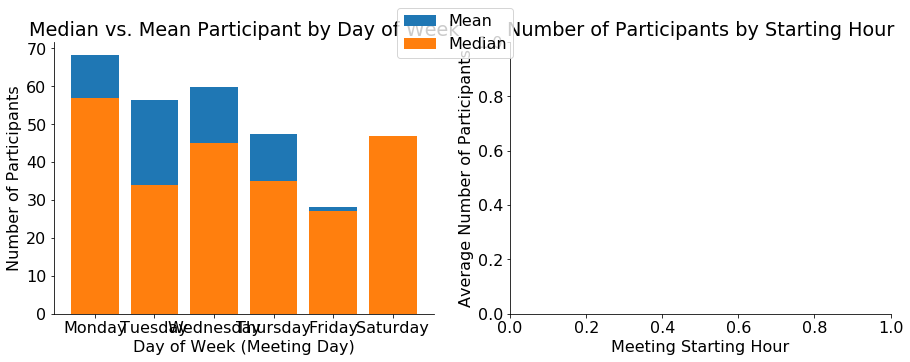

In [22]:
fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(15,5))
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_week_df = DataFrame(data = {
    'median':meeting.groupby('day_of_week',sort=False).median()['Participants'],
    'mean':meeting.groupby('day_of_week',sort=False).mean()['Participants']
})

day_week_df = day_week_df.reindex(cats)
day_week_df= day_week_df.reset_index()

ax[0].bar(x=day_week_df['day_of_week'] , height=day_week_df['mean'],label="Mean")
ax[0].bar(x=day_week_df['day_of_week'] , height=day_week_df['median'],label="Median")
fig.legend(loc="upper center",ncol=1)

ax[0].set_xlabel("Day of Week (Meeting Day)")
ax[0].set_ylabel("Number of Participants")
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].set_title('Median vs. Mean Participant by Day of Week')
# plt.xticks(rotation=45) 

ax[1].set_ylabel("Average Number of Participants")
ax[1].set_xlabel("Meeting Starting Hour")

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].set_title('Number of Participants by Starting Hour')

participant_df = meeting[['starting_formatted','Participants']]
# participant_df.groupby('starting_formatted').mean().plot.bar(ax=ax)
plotting = participant_df.groupby('starting_formatted').mean().reset_index()
ax[1].bar(plotting['starting_formatted'],plotting['Participants'])
plt.xticks(meeting['starting_formatted'])
# plt.savefig('participant_v_start.png',bbox='tight')


plt.savefig('meetin_by_day.PDF')


In [259]:
day_week_df

,day_of_week,median,mean
0,Monday,57,68.241379
1,Tuesday,34,56.333333
2,Wednesday,45,59.697674
3,Thursday,35,47.325000
4,Friday,27,28.166667
5,Saturday,47,47.000000


# PDFminer Method 

Gathering Number of Agenda Items

In [29]:
import re
import pdfminer
from subprocess import check_output
from bs4 import BeautifulSoup
from collections import defaultdict

In [30]:
def find_near(x, y):
    for x_ in range(x-5, x+5):
        for y_ in range(y-5, y+5):
            if (x_, y_) in text:
                return text[(x_, y_)]
    return None

meeting_id = meeting['Meeting_ID']
agenda_items = []
overall_list = []
for i in meeting_id:
    agenda_file = "pdf_agendas/" + i +".pdf"
    try:
        s = check_output(["pdf2txt.py", "-t", "html", "-Y", "loose", agenda_file])
    except Exception:
        agenda_items.append("N/A")
        overall_list.append("N/A")
        continue
    page = BeautifulSoup(s)

    text = {} # key=(x,y), val=text

    for div in page.find_all("div"): #gets a list of different div tags 
        style = div.attrs.get("style", "") #attrs will tell you the positioning
        m1 = re.search("left:(\d+)px", style)
        m2 = re.search("top:(\d+)px", style)
        if m1 and m2:
            x, y = int(m1.group(1)), int(m2.group(1))#each parenthesis is a different group
            text[(x,y)] = div.get_text()

    agenda_dict = {}
    rand_str = ""

    for (x,y), t in text.items():
        
        # agenda items are roughly at x=170
        if 165 < x < 175:
            # agenda numbers are rougly at x=69, same y as text
            num = find_near(69, y)
            if num and re.match('[0-9]+',num) != None:
                agenda_num = int(re.match('[0-9]+',num).group(0))
                agenda_dict[agenda_num] = t
                rand_str+=t
    agenda_items.append(agenda_dict)
    overall_list.append(rand_str)
    

Working with Agenda Item Words

In [31]:
meeting['agenda_num'] = overall_list
agenda_amount = [len(x) for x in agenda_items]
meeting['agenda_amount'] = agenda_amount


(0, 650)

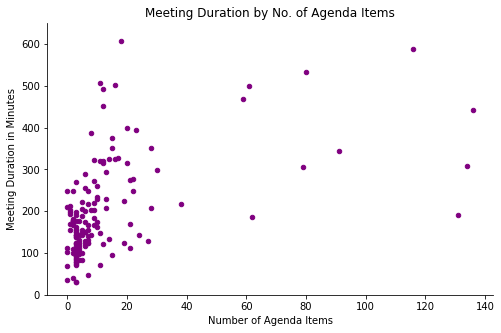

In [32]:
fig, ax = plt.subplots(figsize =(8,5))
meeting.plot.scatter(x='agenda_amount',y='Duration_minutes', ax=ax, color='purple')
ax.set_ylabel("Meeting Duration in Minutes")
ax.set_xlabel("Number of Agenda Items")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Meeting Duration by No. of Agenda Items')
ax.set_ylim(0,650)

(0, 650)

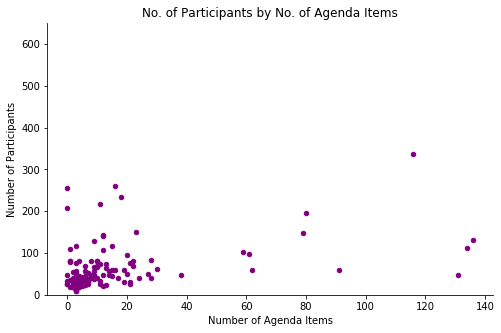

In [33]:
fig, ax = plt.subplots(figsize =(8,5))
meeting.plot.scatter(x='agenda_amount',y='Participants', ax=ax, color='purple')
ax.set_ylabel("Number of Participants")
ax.set_xlabel("Number of Agenda Items")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('No. of Participants by No. of Agenda Items')
ax.set_ylim(0,650)

# Playing with Multiple Regression Predicting No. of Participants

In [34]:
meeting['starting_formatted']=[int(x.strftime("%H")) for x in starting]

Categorizing Meeting Start Time

1 = Before 9 AM (Before Work)
2 = Between 9AM - 5 PM (During Work)
3 = After 5PM (After Work)

In [35]:
meeting

,Meeting_ID,Topic,Scheduled_Start_Time,Zoom_Meeting_Start_Time,Zoom_Meeting_End_Time,Duration,Participants,Recording,Agenda_Link,Minutes_Link,Duration_minutes,text,note_text,agenda_key,note_key,day_of_week,day_of_week_coded,starting_formatted,agenda_num,agenda_amount
0,954410442,CCEC,4:30:00 PM,3/31/2020 15:40,6:27 PM,2:47:55,52,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,167.033,COMMON COUNCIL EXECUTIVE COMMITTEECity of Madi...,"City of MadisonMadison, WI 53703www.cityofmad...","[committee, council, madison, public, city, co...","[ald, city, council, committee, kemble, bidar,...",Tuesday,2,15,Establishing a Body-Worn Camera Feasibility Re...,7
1,531697510,Common Council,6:30:00 PM,3/31/2020 17:04,02:53 AM(Next day),9:48:36,337,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,588.15,COMMON COUNCILCity of MadisonAgenda - AmendedC...,"City of MadisonMadison, WI 53703www.cityofmad...","[sponsors, plans, planning, plan, planned, pub...","[sponsors, streets, street, res, city, approve...",Tuesday,2,17,Commerating the 50th anniversary of Earth Day ...,116
2,411578576,"Finance Committee: Meeting of April 6, 2020",4:30:00 PM,4/6/2020 15:40,5:49 PM,2:09:00,31,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,129.033,FINANCE COMMITTEECity of MadisonAgenda - Appro...,"City of MadisonMadison, WI 53703www.cityofmad...","[finance, meeting, covid, city, program, trans...","[motion, bidar, moreland, meter, mckinney, com...",Monday,1,15,A Resolution to authorize the noncompetitive p...,6
3,563608269,"CCEC: Meeting of April 9, 2020",6:00:00 PM,4/9/2020 16:57,7:53 PM,2:56:08,36,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,176.033,COMMON COUNCIL EXECUTIVE COMMITTEECity of Madi...,"City of MadisonMadison, WI 53703www.cityofmad...","[comments, comment, city, meeting, meetings, c...","[ald, information, informative, staff, eoc, co...",Thursday,4,16,Discuss Council's Role & Response during COVID...,2
4,468948855,"Plan Commission: Meeting of April 13, 2020",5:30:00 PM,4/13/2020 16:35,9:14 PM,4:38:54,80,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,278.067,PLAN COMMISSIONCity of MadisonAgenda - Approve...,"City of MadisonMadison, WI 53703www.cityofmad...","[building, buildings, plan, planning, plans, p...","[police, update, chief, public, minutes, motio...",Monday,1,16,General Public Correspondence to the Plan Comm...,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,93491014777,Public Safety Review Committee Budget Subcommi...,NaN,7/29/2020 17:46,8:17 PM,2:30:50,21,Yes,NaN,NaN,150.033,N/A,N/A,[],[],Wednesday,3,17,N/A,3
151,98563848547,"Plan Commission: Meeting of July 30, 2020",5:00:00 PM,7/30/2020 15:58,8:06 PM,4:08:29,54,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,248.067,PLAN COMMISSIONCity of MadisonAgenda - Approve...,"City of MadisonMadison, WI 53703www.cityofmad...","[meeting, plan, planning, city, comments, comm...","[meeting, meetings, plan, planning, zellers, m...",Thursday,4,15,Plan Commission Public Comment Period\nPotenti...,2
152,99885787121,Body-Worn Camera Feasibility Review Committee:...,5:30:00 PM,7/30/2020 17:06,7:35 PM,2:28:11,23,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,148.033,BODY-WORN CAMERA FEASIBILITY REVIEW COMMITTEEC...,"City of MadisonMadison, WI 53703www.cityofmad...","[meeting, meetings, discussion, pdf, committee...","[committee, costs, cost, body, video, vendor, ...",Thursday,4,17,PUBLIC COMMENT FOR THE 7/30/2020 MEETING OF TH...,5
153,94972195424,Task Force on Municipal Golf in Madison Parks:...,6:00:00 PM,7/30/2020 17:35,8:24 PM,2:49:27,81,Yes,https://madison.legistar.com/View

In [36]:
X = meeting[['agenda_amount','Duration_minutes','day_of_week_coded']]
time_block = []
for x in meeting['starting_formatted']:
    if 9<=x<=17:
        time_block.append(2)
    elif x >17:
        time_block.append(3)
    else:
        time_block.append(1)
X['starting_formatted']=time_block


In [37]:
y = meeting['Participants']
regr = linear_model.LinearRegression()
regr.fit(X, y)
encoded_time_block = 15
agenda_count = 10
duration = 60
weekday_coded = 2

In [39]:
predicted = regr.predict([[encoded_time_block, agenda_count, duration,weekday_coded]])
print('(Test Case) The number of Partipants will be around {} people \n'.format(predicted))


def formula(reg, columns):
    rv = ""
    for i in range(len(columns)):
        rv += "{}*{} + ".format(reg.coef_[0], columns[i])
    rv += str(reg.intercept_)
    return rv

print("Number of Participants ~= " + formula(regr, ['starting_formatted', 'agenda_amount','Duration_minutes','day_of_week_coded']))





(Test Case) The number of Partipants will be around [-3.95242465] people 

Number of Participants ~= 0.12071790346548994*starting_formatted + 0.12071790346548994*agenda_amount + 0.12071790346548994*Duration_minutes + 0.12071790346548994*day_of_week_coded + -42.151429802965296


# Histogram of Participants

In [270]:
meeting['Participants'].describe()

count    155.000000
mean      56.019355
std       51.616904
min        9.000000
25%       25.000000
50%       39.000000
75%       65.000000
max      337.000000
Name: Participants, dtype: float64

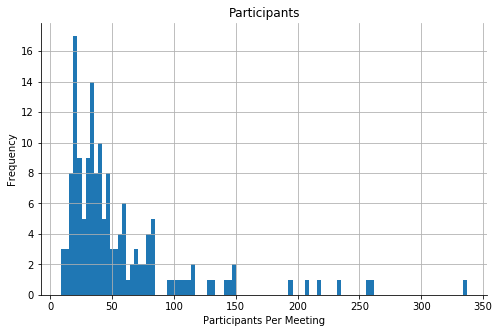

In [380]:
fig, ax = plt.subplots(figsize =(8,5))
meeting.hist(column='Participants',ax=ax, bins=100)
ax.set_ylabel("Frequency")
ax.set_xlabel("Participants Per Meeting")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('Participants_hist.EPS')

In [272]:
meeting['Participants'].mean()

56.019354838709674

# Playing around with Text Analysis

In [273]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [274]:
import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
from nltk import corpus
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

# 2. Create a list of stop words


In [275]:
# Create a list of stop words from nltk
stop_words = set(stopwords.words("english"))

In [276]:
meeting['agenda_num']

0      Establishing a Body-Worn Camera Feasibility Re...
1      Commerating the 50th anniversary of Earth Day ...
2      A Resolution to authorize the noncompetitive p...
3      Discuss Council's Role & Response during COVID...
4      General Public Correspondence to the Plan Comm...
                             ...                        
150                                                  N/A
151    Plan Commission Public Comment Period\nPotenti...
152    PUBLIC COMMENT FOR THE 7/30/2020 MEETING OF TH...
153    Task Force Deliberation, Discussion, and Possi...
154    Fiduciary Investment Review:\n-Market Review\n...
Name: agenda_num, Length: 155, dtype: object

# 3. Pre-process the dataset to get a cleaned, normalized text corpus¶


In [277]:
meeting['note_text']

0      City of MadisonMadison, WI  53703www.cityofmad...
1      City of MadisonMadison, WI  53703www.cityofmad...
2      City of MadisonMadison, WI  53703www.cityofmad...
3      City of MadisonMadison, WI  53703www.cityofmad...
4      City of MadisonMadison, WI  53703www.cityofmad...
                             ...                        
150                                                  N/A
151    City of MadisonMadison, WI  53703www.cityofmad...
152    City of MadisonMadison, WI  53703www.cityofmad...
153    City of MadisonMadison, WI  53703www.cityofmad...
154                                                  N/A
Name: note_text, Length: 155, dtype: object

In [359]:
# Pre-process dataset to get a cleaned and normalised text corpus
corpus = []
meeting['note_text']
ds_count = len(meeting.agenda_num)
for i in range(0, ds_count):
    # Remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', str(meeting['agenda_num'][i]))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # Remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # Convert to list from string
    text = text.split()
    
    # Stemming
    ps=PorterStemmer()
    
    # Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [360]:
# Tokenize the text and build a vocabulary of known words
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [361]:
# Sample the returned vector encoding the length of the entire vocabulary
# list(cv.vocabulary_.keys())

# 4. Extract most frequently occurring keywords and n-grams¶


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


        Keyword  Frequency
0      district        759
1            th        621
2       madison        527
3          city        492
4    aldermanic        396
5        public        370
6         class        369
7        street        365
8   authorizing        356
9            ad        343
10        alder        324
11       police        307
12          dba        302
13        agent        298
14         beer        294
15       liquor        289
16      general        277
17          new        277
18         plan        261
19     contract        250


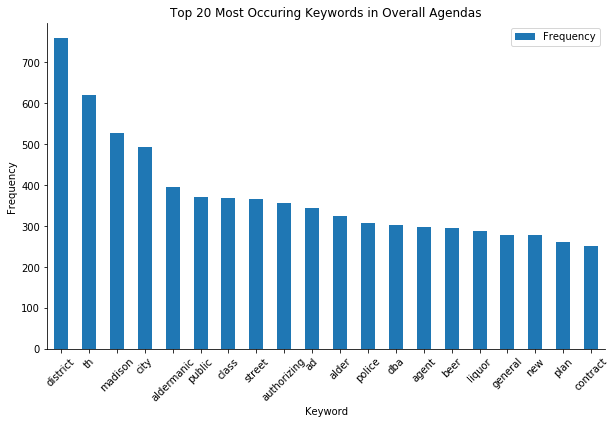

In [384]:
# View most frequently occuring keywords
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

# Convert most freq words to dataframe for plotting bar plot, save as CSV
top_words = get_top_n_words(corpus, n=20)
top_df = DataFrame(top_words)
top_df.columns=["Keyword", "Frequency"]
print(top_df)
top_df.to_csv('_top_words.csv')

# Barplot of most freq words
# import seaborn as sns
# sns.set(rc={'figure.figsize':(13,8)})
fig, ax = plt.subplots(figsize = (10,6))
top_df.plot.bar(x="Keyword",ax=ax)

ax.set_ylabel("Frequency")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Top 20 Most Occuring Keywords in Overall Agendas')
plt.xticks(rotation=45) 
# g.set_xticklabels(g.get_xticklabels(), rotation=45)
# g.figure.savefig("_keyword.png", bbox_inches = "tight")
# plt.clf()
plt.savefig('top20keywords.EPS')

**Implementing Keywords into Multiple Regression**
**Run the above top keyword with meeting['note_text'] first**



Run the Regression cell above first

In [312]:
X

,agenda_amount,Duration_minutes,day_of_week_coded,starting_formatted
0,7,167.033,2,2
1,116,588.15,2,2
2,6,129.033,1,2
3,2,176.033,4,2
4,22,278.067,1,2
...,...,...,...,...
150,3,150.033,3,2
151,2,248.067,4,2
152,5,148.033,4,2
153,1,169.033,4,2


In [368]:
X = meeting[['agenda_amount','Duration_minutes','day_of_week_coded']]
time_block = []
for x in meeting['starting_formatted']:
    if 9<=x<=17:
        time_block.append(2)
    elif x >17:
        time_block.append(3)
    else:
        time_block.append(1)
X['starting_formatted']=time_block

In [369]:
top_20 = list(top_df.drop([1,8])['Keyword'])
for top_word in top_20:
    word_count=[]
    for text in meeting['note_text']:
        if top_word in text.lower().split():
            word_count.append(1)
        else:
            word_count.append(0)
    X[top_word]=word_count

In [377]:
y = meeting['Participants']
regr = linear_model.LinearRegression()
regr.fit(X, y)
agenda_numbers=10
Duration_minutes=50
day_of_week_coded=5
district=0
madison=0
city=0
aldermanic=0
public=0
class_=0
street=0
ad=0
alder=0
police=0
dba=0
agent=0
beer=0
liquor=0
general=0
new=0
plan=0
contract=0


predicted = regr.predict([[agenda_numbers,Duration_minutes,day_of_week_coded,starting_coded,district,madison,city,aldermanic,public,class_,street,ad,alder,police,dba,agent,beer,liquor,general,new,plan,contract]])





In [378]:
print('(Test Case) The number of Partipants will be around {} people \n'.format(predicted))

print("Keywords from agenda_num applied on note_text")


def formula(reg, columns):
    rv = ""
    for i in range(len(columns)):
        rv += "{}*{} + ".format(reg.coef_[i], columns[i])
    rv += str(r.intercept_)
    return rv

print("Number of Participants ~= " + formula(regr, list(X.columns)))




(Test Case) The number of Partipants will be around [6.70136081] people 

Keywords from agenda_num applied on note_text
Number of Participants ~= 0.5046074346315635*agenda_amount + 0.3252237369589667*Duration_minutes + -0.5687704719699652*day_of_week_coded + 12.75946769659755*starting_formatted + -7.788741483318138*district + 6.5815169662160296*madison + 6.581516966215995*city + 34.71268272535602*aldermanic + 12.054833553619423*public + -38.07100177969564*class + -8.136800819475164*street + -0.6532974570977177*ad + -7.553101846314409*alder + 3.8604038000102094*police + -6.743626082937745*dba + -0.5102251922715202*agent + -6.743626082937754*beer + -6.743626082937754*liquor + -22.02882919086806*general + -6.445809362395887*new + -10.28904627131848*plan + -3.448796385910568*contract + -10.849966498419846


**Multiple Regression one 1's or 0's for each Keyword** 

Used the keywords from meetings['agenda_nums'] and tested frequency in meetings['agenda_nums']

In [339]:
X_with_one = meeting[['agenda_amount','Duration_minutes','day_of_week_coded']]
time_block = []
for x in meeting['starting_formatted']:
    if 9<=x<=17:
        time_block.append(2)
    elif x >17:
        time_block.append(3)
    else:
        time_block.append(1)
X_with_one['starting_formatted']=time_block

top_20 = list(top_df.drop([1,8])['Keyword'])
for top_word in top_20:
    word_count=[]
    for text in meeting['agenda_num']:
        if top_word in text.lower().split():
            word_count.append(1)
        else:
            word_count.append(0)
    X_with_one[top_word]=word_count



In [350]:
list(X_with_one.columns[4:])

['district',
 'madison',
 'city',
 'aldermanic',
 'public',
 'class',
 'street',
 'ad',
 'alder',
 'police',
 'dba',
 'agent',
 'beer',
 'liquor',
 'general',
 'new',
 'plan',
 'contract']

In [351]:
y = meeting['Participants']
regr = linear_model.LinearRegression()
regr.fit(X_with_one, y)
agenda_numbers=0
Duration_minutes=50
day_of_week_coded=5
district=0
madison=0
city=0
aldermanic=0
public=0
class_=0
street=0
ad=0
alder=0
police=0
dba=0
agent=0
beer=0
liquor=0
general=0
new=0
plan=0
contract=0


predicted = regr.predict([[agenda_numbers,Duration_minutes,day_of_week_coded,starting_coded,district,madison,city,aldermanic,public,class_,street,ad,alder,police,dba,agent,beer,liquor,general,new,plan,contract]])




In [352]:
print('(Test Case) The number of Partipants will be around {} people \n'.format(predicted))

print("Keywords from agenda_num applied on agenda_num")


def formula(reg, columns):
    rv = ""
    for i in range(len(columns)):
        rv += "{}*{} + ".format(reg.coef_[i], columns[i])
    rv += str(r.intercept_)
    return rv

print("Number of Participants ~= " + formula(regr, list(X_with_one.columns)))




(Test Case) The number of Partipants will be around [12.26400276] people 

Number of Participants ~= 0.777030464040324*agenda_amount + 0.32179118549659586*Duration_minutes + 0.9925385425107562*day_of_week_coded + 18.76979774434339*starting_formatted + 0.552238321561672*district + 0.24579648960263353*madison + -2.0672982717949924*city + 23.11625320069768*aldermanic + -6.211979036858562*public + -18.921701320083145*class + -4.756835908907971*street + -5.448872454890948*ad + 1.4327621831747894*alder + 6.078143963686201*police + -18.92170132008315*dba + -21.15102330064195*agent + -18.92170132008314*beer + -18.921701320083145*liquor + -13.574652341275966*general + 2.5211267988591137*new + -5.443614298820999*plan + -4.751037912356473*contract + -10.849966498419846


**Implementing n-grams**

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


                Bi-gram  Frequency
0   aldermanic district        396
1        district alder        295
2                 th ad        277
3     class combination        222
4    combination liquor        222
5           liquor beer        222
6       madison general        194
7     general ordinance        194
8               llc dba        182
9            city clerk        177
10             ald dist        176
11        police sector        174
12         alcohol food        167
13      food aldermanic        164
14               th ald        149
15         beer alcohol        148
16         city madison        135
17      section madison        133
18    authorizing mayor        132
19          public work        132


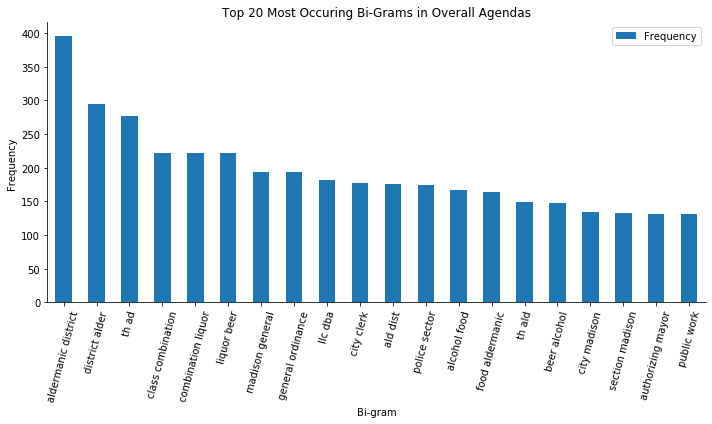

In [409]:
# Most frequently occuring bigrams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

# Convert most freq bigrams to dataframe for plotting bar plot, save as CSV
top2_words = get_top_n2_words(corpus, n=20)
top2_df = DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Frequency"]
print(top2_df)
top2_df.to_csv( '_bigrams.csv')

# Barplot of most freq Bi-grams
# import seaborn as sns
# sns.set(rc={'figure.figsize':(13,8)})
fig, ax = plt.subplots(figsize = (10,6))
# h=plt.bar(x="Bi-gram", height="Frequency", data=top2_df)
# h.set_xticklabels(h.get_xticklabels(), rotation=75)
top2_df.plot.bar(x="Bi-gram",ax=ax)

ax.set_ylabel("Frequency")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Top 20 Most Occuring Bi-Grams in Overall Agendas')
plt.xticks(rotation=75) 
plt.tight_layout()
plt.savefig("bi-gram.EPS")

Participants by starting hour

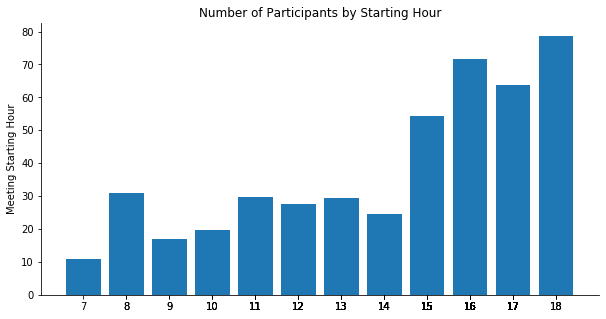

In [467]:
fig, ax = plt.subplots(figsize = (10,5))


**K MEANS on 2 Columns**

In [483]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)


In [497]:
kmean_df = meeting[['Duration_minutes','Participants']]
kmean_df

,Duration_minutes,Participants
0,167.033,52
1,588.15,337
2,129.033,31
3,176.033,36
4,278.067,80
...,...,...
150,150.033,21
151,248.067,54
152,148.033,23
153,169.033,81


In [494]:
Kmean.fit(kmean_df)
y_kmeans = Kmean.predict(kmean_df)


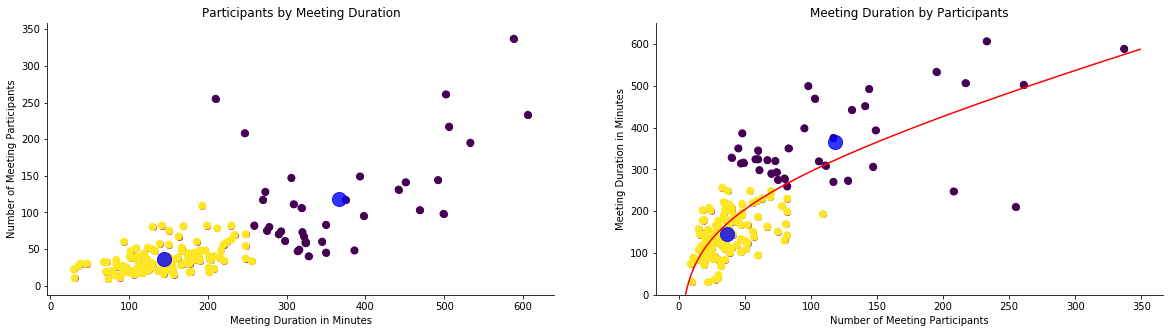

In [510]:
fig, ax = plt.subplots(nrows=1, ncols=2 ,figsize = (20,5))
ax[0].scatter(x='Duration_minutes', y = 'Participants', color='purple',data=meeting)
ax[0].set_xlabel("Meeting Duration in Minutes")
ax[0].set_ylabel("Number of Meeting Participants")
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].set_title('Participants by Meeting Duration')
ax[0].scatter(kmean_df['Duration_minutes'], kmean_df['Participants'], c=y_kmeans, s=50, cmap='viridis')
centers = Kmean.cluster_centers_
ax[0].scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=.8);


ax[1].scatter(x='Participants', y = 'Duration_minutes', color='purple',data=meeting)
ax[1].set_ylabel("Meeting Duration in Minutes")
ax[1].set_xlabel("Number of Meeting Participants")
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].set_title('Meeting Duration by Participants')
ax[1].set_ylim(0,650)
ax[1].scatter( kmean_df['Participants'],kmean_df['Duration_minutes'], c=y_kmeans, s=50, cmap='viridis')
centers = Kmean.cluster_centers_
ax[1].scatter( centers[:, 1],centers[:, 0], c='blue', s=200, alpha=.8);

lr = LinearRegression()
poly_df=get_xterms(meeting['Participants'])
lr.fit(poly_df, meeting[['Duration_minutes']])
x = np.arange(0.1,350,1)
ax[1].plot(x, lr.predict(get_xterms(x)),'r')
plt.savefig('participants_vs_duration.png', bbox='tight')

In [3]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(meeting['Participants'], meeting['Duration_minutes'], c=meeting['Committees'].map(colors))


NameError: name 'plt' is not defined